In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Newton-Raphson

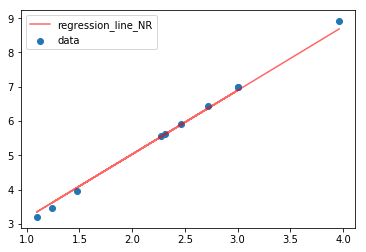

In [51]:
import numpy as np
np.random.seed(222)

X = np.random.normal(2,1, (10, 1))
f_target = lambda x: x[0]*2+1

Y = X*2+1
X = np.hstack([X, np.ones((X.shape[0], 1))])
W = np.random.normal(0,2,len(X[0]+1)).reshape(1,-1)



f = lambda X, W: X@W.T

loss = lambda Y,X,W: np.square(Y-f(X,W))/2
loss_der = lambda Y,X,W: (f(X,W)-Y)*X

# optimize using newton-rhapson
lr=1e-2
batch_size = 1
for e in range(10000):
    W = W -np.sum(loss(Y,X,W)/loss_der(Y,X,W))*lr


plt.scatter(X[:,0], Y, label='data')
plt.plot(X[:,0], f(X,W), c='red', alpha=.6, label='regression_line_NR')       
plt.legend()

# Advanced Optimizers

In [143]:
class Momentum:
    
    def __init__(self, alpha=.95, epsilon=1e-3):
        self.alpha = alpha
        self.epsilon=epsilon
        self.vel = []
        
    def apply_gradients(self,parameters, grads):        
        for i, (p, g) in enumerate(zip(parameters,grads)):
            if len(self.vel) == 0:
                self.vel.append(self.epsilon*g)
            else:
                # calculate velocity
                self.vel[i] = self.alpha*self.vel[i]+self.epsilon*g
                parameters[i] -= self.vel[i]*lr
        return parameters
    
class RMSProp:
    
    def __init__(self, epsilon=1e-3):
        self.alpha = alpha
        self.epsilon=epsilon
        self.vel = []
        self.gain = []
        self.prev_grad = None
        
    def apply_gradients(self,parameters, grads):        
        for i, (p, g) in enumerate(zip(parameters,grads)):
            if self.prev_grad is None:
                self.gain.append(np.ones_like(g))
            else:
                
                # calculate gain
                same = (np.sign(g)*np.sign(self.prev_grad[i]))>0.5
                self.gain[i][same] += .05
                self.gain[i][~same]*=.95
                
                parameters[i] -= self.gain[i]*g*epsilon
        
        self.prev_grad = grads.copy()
        
        return parameters
    
       

class SGD:
    
    def __init__(self, lr):
        self.lr = lr
        
    def apply_gradients(self,parameters, grads):        
        for i, (p, g) in enumerate(zip(parameters,grads)):
            parameters[i] -= self.gain[i]*g*self.lr

        return parameters

    
# default gradient descent
def apply_gradients(parameters, grads, lr):
    for i, (p, g) in enumerate(zip(parameters,grads)):
        parameters[i] -= lr*g
    return parameters




# Linear Regression

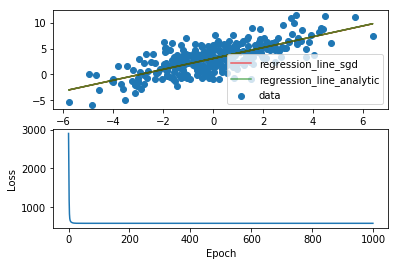

In [138]:
import numpy as np
np.random.seed(222)

NUM_POINTS=300

noise = 0
noise = np.random.normal(0,2, (NUM_POINTS,1))

data = np.random.normal(0,2, (NUM_POINTS, 1))
X = data.copy()
f_target = lambda x: x[0]+3

bias = True

Y = np.apply_along_axis(arr=X, axis=1, func1d=f_target).reshape(-1,1) + noise

if bias:
    X = np.hstack([X, np.ones((len(X), 1))])
    
W = np.random.normal(0,1,len(X[0])).reshape(1,-1)

f = lambda X, W: np.dot(X, W.T)



epsilon = 1e-3
alpha=.99

lr=1e-2
epochs=1000
batch_size=4
losses = []

apply_gradients = Momentum(epsilon,alpha).apply_gradients
apply_gradients = RMSProp(epsilon).apply_gradients
#apply_gradients = stochastic_gradient_descent

for e in range(epochs):
    losses.append(loss(Y,X,W).sum())
    for i in range(0, NUM_POINTS, batch_size):
        [W] = apply_gradients([W], [gradients(Y[i:i+batch_size],X[i:i+batch_size],W)], lr=lr)
# analytic solution 
W_analytic = np.linalg.inv(X.T@X)@X.T@Y
W_analytic = W_analytic.T    
    
plt.subplot(211)
plt.scatter(data, Y, label='data')
plt.plot(data, f(X,W), c='red', alpha=.6, label='regression_line_sgd')
plt.plot(data, f(X, W_analytic), c='g', alpha=.6,  label='regression_line_analytic')
plt.xlabel('X')
plt.xlabel('Y')
plt.legend()

plt.subplot(212)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(losses)




In [89]:
gradients(Y[i],X[i],W)

array([0.07475838, 0.00121083])

# Logistic Regression Binomial

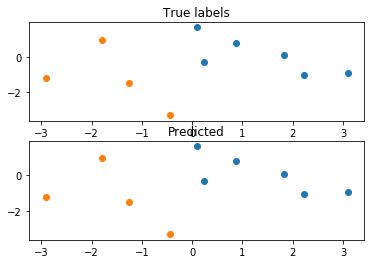

In [204]:
import numpy as np
np.random.seed(222)

NUM_POINTS = 10
NUM_CLASSES = 2

noise = 0
noise = np.random.normal(0,2, (NUM_POINTS,1))

data = np.random.normal(0,2, (NUM_POINTS, 2))
X = data.copy()
f_target = lambda x: x[0]

bias = True

Y = (np.apply_along_axis(arr=X, axis=1, func1d=f_target).reshape(-1,1))>0
Y = Y.astype(np.int32)

if bias:
    X = np.hstack([X, np.ones((len(X), 1))])
    
W = np.random.normal(0,2,(1, len(X[0])))

f = lambda X, W: np.dot(X, W.T)

def sigmoid(X, W):
    y = X@W.T
    y = np.exp(y)
    y = 1/(1+y)
    return y
    
def cross_entropy(Y, Y_, p):
    return -np.sum((Y!=Y_)*np.log(p))

def grad_sigmoid(Y,X, W):
    
    g = sigmoid(X,W)
    g = g*(1-g)
    return g
    
def grad(Y,X,W):
    sig = sigmoid(X,W)
    g = Y-sig
    return g.T@X


lr=1e-4
for i in range(10000):
    for j in range(0, len(X), 2):
        p = sigmoid(X[j:j+2],W)        
        Y_ = (p>0.5).astype(np.int32)
        loss = cross_entropy(Y[j:j+2],Y_, p)
        g = grad(Y[j:j+2],X[j:j+2],W)
        W -= lr*g
    if i%1000 == 0:
        print(f'Loss: {np.sum(loss)}', end='\r')



        
# Plot the results

Y_ = (sigmoid(X,W)>.5).astype(np.int32)
c1, c2 = data[Y.flatten()==1], data[Y.flatten()!=1]
c1_, c2_ = data[Y_.flatten()==1], data[Y_.flatten()!=1]


plt.subplot(211)
plt.title('True labels')
plt.scatter(c1[:,0], c1[:,1])
plt.scatter(c2[:,0], c2[:,1])

plt.subplot(212)
plt.title('Predicted')
plt.scatter(c1_[:,0], c1_[:,1])
plt.scatter(c2_[:,0], c2_[:,1])

# Softmax Regression

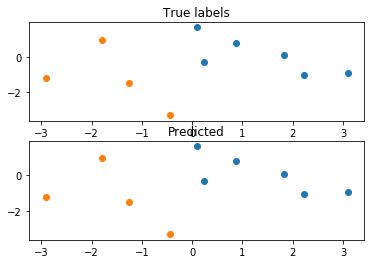

In [199]:
import numpy as np
np.random.seed(222)

NUM_POINTS = 10
NUM_CLASSES = 2

noise = 0
noise = np.random.normal(0,2, (NUM_POINTS,1))

data = np.random.normal(0,2, (NUM_POINTS, 2))
X = data.copy()
f_target = lambda x: x[0]

bias = True

Y = (np.apply_along_axis(arr=X, axis=1, func1d=f_target).reshape(-1,1))>0
Y = Y.astype(np.int32)

if bias:
    X = np.hstack([X, np.ones((len(X), 1))])
    
W = np.random.normal(0,2,(NUM_CLASSES, len(X[0])))

f = lambda X, W: np.dot(X, W.T)

def softmax(X,W):
    y = np.exp(X@W.T)
    y = y/np.sum(y, axis=1).reshape(-1,1)
    return y

def cross_entropy(Y, Y_, p):
    return -np.sum((Y!=Y_)*np.log(p))
    

def grad_softmax(Y,X, W):
    
    g = softmax(X,W)
    g[np.arange(Y.shape[0]), Y]-=1
    return g
    
def grad(Y,X,W):
    g_soft = grad_softmax(Y,X,W)
    g=g_soft.T@X
    # divide by batch size
    g/=Y.shape[0]
    return g


lr=1e-4
for i in range(10000):
    for j in range(0, len(X), 2):
        p = softmax(X[j:j+2],W)
        Y_ = np.argmax(p, axis=1)[:, None]
        loss = cross_entropy(Y[j:j+2],Y_, p)
        g = grad(Y[j:j+2],X[j:j+2],W)
        W -= lr*g
    if i%1000 == 0:
        print(f'Loss: {np.sum(loss)}', end='\r')



        
# Plot the results

Y_ = np.argmax(softmax(X,W), axis=1)[:, None]

c1, c2 = data[Y.flatten()==1], data[Y.flatten()!=1]
c1_, c2_ = data[Y_.flatten()==1], data[Y_.flatten()!=1]


plt.subplot(211)
plt.title('True labels')
plt.scatter(c1[:,0], c1[:,1])
plt.scatter(c2[:,0], c2[:,1])

plt.subplot(212)
plt.title('Predicted')
plt.scatter(c1_[:,0], c1_[:,1])
plt.scatter(c2_[:,0], c2_[:,1])

In [ ]:
# Good solution

import numpy as np

def solution1(X, y):
    # Type your solution here 
    # Run 10,000 steps of projected gradient descent
    
    # include bias
    X = np.hstack([X, np.ones((len(X), 1))])


    y = y.reshape(-1,1)
    # row vector  W
    W = np.random.rand(len(X[0])).reshape(1,-1)

    f = lambda X, W: np.dot(X, W.T)
    loss = lambda Y,X,W: np.square(Y-f(X,W))/2
    loss_der = lambda Y,X,W: (f(X,W)-Y)*X
    def gradients(Y,X,W):
        return np.mean(loss_der(Y,X,W), axis=0)

    lr = 1e-4
    batch_size = 2
    steps = int(10000/batch_size)
    projection_steps = 1
    for s in range(steps):
        for i in range(0, len(X), batch_size):
            W -= gradients(y[i:i+batch_size],X[i:i+batch_size],W)*lr
        if s%projection_steps==0:
            W [:10]*=W[:10]>0

    # last projection
    W [:10]*=W[:10]>0

    return W.flatten()[:-1], W[0,-1]

if __name__ == '__main__':
    import os
    output_path = os.environ['OUTPUT_PATH']
    
    X = eval(input().strip())
    y = eval(input().strip())
    
    w_candidate, b_candidate = solution1(X, y)
    sol_candidate = np.append(w_candidate, b_candidate)
    np.savetxt(os.environ['OUTPUT_PATH'], sol_candidate)

In [ ]:
# solution 2

import numpy as np


class RMSProp:
    
    def __init__(self, epsilon=1e-3):
        self.epsilon=epsilon
        self.gain = []
        self.prev_grad = None
        
    def apply_gradients(self,parameters, grads):        
        for i, (p, g) in enumerate(zip(parameters,grads)):
            if self.prev_grad is None:
                self.gain.append(np.ones_like(g))
            else:
                
                # calculate gain
                same = (np.sign(g)*np.sign(self.prev_grad[i]))>0.5
                self.gain[i][same] += .05
                self.gain[i][~same]*=.95
                
                parameters[i] -= self.gain[i]*g*self.epsilon
        
        self.prev_grad = grads.copy()
        
        return parameters
    
       


def solution1(X, y):
    # Type your solution here 
    # Run 10,000 steps of projected gradient descent
    
    # include bias
    X = np.hstack([X, np.ones((len(X), 1))])


    y = y.reshape(-1,1)
    # row vector  W
    W = np.random.rand(len(X[0])).reshape(1,-1)

    f = lambda X, W: np.dot(X, W.T)
    loss = lambda Y,X,W: np.square(Y-f(X,W))/2
    loss_der = lambda Y,X,W: (f(X,W)-Y)*X
    def gradients(Y,X,W):
        return np.mean(loss_der(Y,X,W), axis=0)

    lr = 1e-4

    optimizer = RMSProp(lr)

    batch_size = 2
    steps = int(10000/batch_size)
    projection_steps = 1
    for s in range(steps):
        for i in range(0, len(X), batch_size):
            [W] =  optimizer.apply_gradients([W], [gradients(y[i:i+batch_size],X[i:i+batch_size],W)])
        if s%projection_steps==0:
            W [:10]*=W[:10]>0

    # last projection
    W [:10]*=W[:10]>0

    return W.flatten()[:-1], W[0,-1]

if __name__ == '__main__':
    import os
    output_path = os.environ['OUTPUT_PATH']
    
    X = eval(input().strip())
    y = eval(input().strip())
    
    w_candidate, b_candidate = solution1(X, y)
    sol_candidate = np.append(w_candidate, b_candidate)
    np.savetxt(os.environ['OUTPUT_PATH'], sol_candidate)

In [ ]:
# BEST SOLUTIOOOOOON

import numpy as np


class RMSProp:
    
    def __init__(self, epsilon=1e-3):
        self.epsilon=epsilon
        self.gain = []
        self.prev_grad = None
        
    def apply_gradients(self,parameters, grads):        
        for i, (p, g) in enumerate(zip(parameters,grads)):
            if self.prev_grad is None:
                self.gain.append(np.ones_like(g))
            else:
                
                # calculate gain
                same = (np.sign(g)*np.sign(self.prev_grad[i]))>0.5
                self.gain[i][same] += .05
                self.gain[i][~same]*=.95
                
                parameters[i] -= self.gain[i]*g*self.epsilon
        
        self.prev_grad = grads.copy()
        
        return parameters
    
       


def solution1(X, y):
    # Type your solution here 
    # Run 10,000 steps of projected gradient descent
    
    # include bias
    X = np.hstack([X, np.ones((len(X), 1))])


    y = y.reshape(-1,1)
    # row vector  W
    W = np.random.rand(len(X[0])).reshape(1,-1)

    f = lambda X, W: np.dot(X, W.T)
    loss = lambda Y,X,W: np.square(Y-f(X,W))/2
    loss_der = lambda Y,X,W: (f(X,W)-Y)*X
    def gradients(Y,X,W):
        return np.mean(loss_der(Y,X,W), axis=0)

    lr = 1e-3

    optimizer = RMSProp(lr)

    batch_size = 2
    steps = int(10000/batch_size)
    projection_steps = 1
    for s in range(steps):
        for i in range(0, len(X), batch_size):
            [W] =  optimizer.apply_gradients([W], [gradients(y[i:i+batch_size],X[i:i+batch_size],W)])
        if s%projection_steps==0:
            W [:10]*=W[:10]>0

    # last projection
    W [:10]*=W[:10]>0

    return W.flatten()[:-1], W[0,-1]

if __name__ == '__main__':
    import os
    output_path = os.environ['OUTPUT_PATH']
    
    X = eval(input().strip())
    y = eval(input().strip())
    
    w_candidate, b_candidate = solution1(X, y)
    sol_candidate = np.append(w_candidate, b_candidate)
    np.savetxt(os.environ['OUTPUT_PATH'], sol_candidate)

In [ ]:
# works also

import numpy as np


class RMSProp:
    
    def __init__(self, epsilon=1e-3):
        self.epsilon=epsilon
        self.gain = []
        self.prev_grad = None
        
    def apply_gradients(self,parameters, grads):        
        for i, (p, g) in enumerate(zip(parameters,grads)):
            if self.prev_grad is None:
                self.gain.append(np.ones_like(g))
            else:
                # calculate gain
                same = (np.sign(g)*np.sign(self.prev_grad[i]))>0.5
                self.gain[i][same] += .05
                self.gain[i][~same]*=.95
                
                parameters[i] -= self.gain[i]*g*self.epsilon
        
        self.prev_grad = grads.copy()
        
        return parameters
    
       


def solution1(X, y):
    # Type your solution here 
    # Run 10,000 steps of projected gradient descent
    
    # include bias
    X = np.hstack([X, np.ones((len(X), 1))])


    y = y.reshape(-1,1)
    # row vector  W
    W = np.random.rand(len(X[0])).reshape(1,-1)

    f = lambda X, W: np.dot(X, W.T)
    loss = lambda Y,X,W: np.square(Y-f(X,W))/2
    loss_der = lambda Y,X,W: (f(X,W)-Y)*X
    def gradients(Y,X,W):
        return np.mean(loss_der(Y,X,W), axis=0)

    lr = 1e-3

    optimizer = RMSProp(lr)

    batch_size = 1
    steps = int(10000/batch_size)
    projection_steps = 1
    for s in range(steps):
        for i in range(0, len(X), batch_size):
            [W] =  optimizer.apply_gradients([W], [gradients(y[i:i+batch_size],X[i:i+batch_size],W)])
        if s%projection_steps==0:
            W [:10]*=W[:10]>0

    # last projection
    W [:10]*=W[:10]>0

    return W.flatten()[:-1], W[0,-1]

if __name__ == '__main__':